In [1]:
import pathlib
import os
from scipy import signal
from scipy.io import wavfile
import librosa
# import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile as sf

In [2]:
def plot_spec(data:np.array,sr:int,title:str, fpath:str) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  label = str(fpath).split('/')[-1].split('_')[0]
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'{title} / Label: {label}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)


In [3]:
#Reading the wav file:
# file_path = data_path.ls()[3]
file_paths = \
["data_process/CTT5-1-15/33CTT_1.wav", "data_process/CTT5-1-15/33CTT_2.wav", "data_process/CTT5-1-15/33CTT_3.wav", "data_process/CTT5-1-15/33CTT_4.wav",
"data_process/CTT5-1-17/16CTT_1.wav", "data_process/CTT5-1-17/16CTT_2.wav", \
"data_process/CTT5-2-17/37CTT_1.wav", \
"data_process/CTT5-2-15/39CTT_1.wav", \
"data_process/CTT5-2-15/45CTT_1.wav", "data_process/CTT5-2-17/45CTT_2.wav", "data_process/CTT5-2-17/45CTT_3.wav", \
"data_process/CTT5-2-17/11CTT_1.wav", \
"data_process/CTT5-2-17/25CTT_1.wav", \
"data_process/CTT5-3-17/18CTT_1.wav", \
"data_process/CTT5-4-17/9CTT_1.wav", \
"data_process/CTT5-4-17/63CTT_1.wav", "data_process/CTT5-4-17/63CTT_2.wav", "data_process/CTT5-4-17/63CTT_3.wav", "data_process/CTT5-4-17/63CTT_4.wav", "data_process/CTT5-4-17/63CTT_5.wav", \
"data_process/CTT5-5-17/24CTT_1.wav", "data_process/CTT5-5-17/24CTT_2.wav", "data_process/CTT5-5-17/24CTT_3.wav", "data_process/CTT5-5-17/24CTT_4.wav", "data_process/CTT5-5-17/24CTT_5.wav", "data_process/CTT5-5-17/24CTT_6.wav", \
"data_process/CTT5-5-17/64CTT_1.wav", "data_process/CTT5-5-17/64CTT_2.wav"]

file_paths = \
[
# "data_process/CTT5-1-17/33CTT.wav", \
"data_process/CTT5-1-17/16CTT.wav", \
"data_process/CTT5-2-17/37CTT.wav", \
"data_process/CTT5-2-17/39CTT.wav", \
"data_process/CTT5-2-17/45CTT.wav", \
"data_process/CTT5-2-17/11CTT.wav", \
"data_process/CTT5-2-17/25CTT.wav", \
"data_process/CTT5-3-17/18CTT.wav", \
"data_process/CTT5-4-17/9CTT.wav", \
"data_process/CTT5-4-17/63CTT.wav", \
"data_process/CTT5-5-17/24CTT.wav", \
"data_process/CTT5-5-17/64CTT.wav"]

# file_paths = \
# [
# # "data_process/CTT5-1-15/33CTT_1.wav", "data_process/CTT5-1-15/33CTT_2.wav", "data_process/CTT5-1-15/33CTT_3.wav", \
# "data_process/CTT5-1-15/16CTT_1.wav", \
# "data_process/CTT5-2-15/37CTT_1.wav", \
# "data_process/CTT5-2-15/39CTT_1.wav", \
# "data_process/CTT5-2-15/45CTT_1.wav", "data_process/CTT5-2-15/45CTT_2.wav", "data_process/CTT5-2-15/45CTT_3.wav", \
# "data_process/CTT5-2-15/11CTT_1.wav", \
# "data_process/CTT5-2-15/25CTT_1.wav", \
# "data_process/CTT5-3-15/18CTT_1.wav", "data_process/CTT5-3-15/18CTT_2.wav", \
# "data_process/CTT5-4-15/9CTT_1.wav", \
# "data_process/CTT5-4-15/63CTT_1.wav", "data_process/CTT5-4-15/63CTT_2.wav", "data_process/CTT5-4-15/63CTT_3.wav", "data_process/CTT5-4-15/63CTT_4.wav", "data_process/CTT5-4-15/63CTT_5.wav", "data_process/CTT5-4-15/63CTT_6.wav", \
# "data_process/CTT5-5-15/24CTT_1.wav", "data_process/CTT5-5-15/24CTT_2.wav", "data_process/CTT5-5-15/24CTT_3.wav", \
# "data_process/CTT5-5-15/64CTT_1.wav", "data_process/CTT5-5-15/64CTT_2.wav"]

# file_paths = \
# ["data_process/CTT5-1-17/33CTT_1.wav", "data_process/CTT5-1-17/33CTT_2.wav", "data_process/CTT5-1-17/33CTT_3.wav", "data_process/CTT5-1-17/33CTT_4.wav", \
# "data_process/CTT5-1-17/16CTT_1.wav", "data_process/CTT5-1-17/16CTT_2.wav", \
# "data_process/CTT5-2-17/37CTT_1.wav", \
# "data_process/CTT5-2-17/39CTT_1.wav", \
# "data_process/CTT5-2-17/45CTT_1.wav", "data_process/CTT5-2-17/45CTT_2.wav", "data_process/CTT5-2-17/45CTT_3.wav", \
# "data_process/CTT5-2-17/11CTT_1.wav", \
# "data_process/CTT5-2-17/25CTT_1.wav", \
# "data_process/CTT5-3-17/18CTT_1.wav", \
# "data_process/CTT5-4-17/9CTT_1.wav", \
# "data_process/CTT5-4-17/63CTT_1.wav", "data_process/CTT5-4-17/63CTT_2.wav", "data_process/CTT5-4-17/63CTT_3.wav", "data_process/CTT5-4-17/63CTT_4.wav", "data_process/CTT5-4-17/63CTT_5.wav", \
# "data_process/CTT5-5-17/24CTT_1.wav", "data_process/CTT5-5-17/24CTT_2.wav", "data_process/CTT5-5-17/24CTT_3.wav", "data_process/CTT5-5-17/24CTT_4.wav", "data_process/CTT5-5-17/24CTT_5.wav", \
# "data_process/CTT5-5-17/64CTT_1.wav", "data_process/CTT5-5-17/64CTT_2.wav"]

print(len(file_paths))

for i in range(len(file_paths)):
  # print(i)
  file_path = file_paths[i]
  print(file_path)
  wav, sr = librosa.load(file_path,sr=None)
  idx = file_path.split("-17")[0].split("-")[-1]
  # print(idx)
  #Plotting the spectrogram and wave graph
  # plot_spec(wav,sr,'Original wave file',file_paths[i])

  s = idx + "-17"
  n = s
  r = s
  t = s
  p = s
  # print(s)
  
  # n = "2-17"
  # r = "3-17"
  # t = "4-17"
  # p = "5-17"
  # if idx == "1":
  #   n = "2-17"
  #   r = "3-17"
  #   t = "4-17"
  #   p = "5-17"
  # elif idx == "2":
  #   n = "1-17"
  #   r = "3-17"
  #   t = "4-17"
  #   p = "5-17"
  # elif idx == "3":
  #   n = "1-17"
  #   r = "2-17"
  #   t = "4-17"
  #   p = "5-17"
  # elif idx == "4":
  #   n = "1-17"
  #   r = "2-17"
  #   t = "3-17"
  #   p = "5-17"
  # else:
  #   n = "1-17"
  #   r = "2-17"
  #   t = "3-17"
  #   p = "4-17"
  
  # add noise
  wav_n = wav + 0.01*np.random.normal(0,1,len(wav))
#   plot_spec(wav_n,sr,'Noise Added 0.009',file_path)
  file_n = file_path.replace(".wav", "_n.wav").replace(s, n)
  sf.write(file_n, wav_n, sr)

  # shift
  wav_roll = np.roll(wav,int(sr*15))
#   plot_spec(data=wav_roll,sr=sr,title=f'Shifting the wave by Times {sr/10}',fpath=file_path)
  file_r = file_path.replace(".wav", "_r.wav").replace(s, r)
  sf.write(file_r, wav_roll, sr)

  # time stech
  factor = 0.4
  wav_time_stch = librosa.effects.time_stretch(wav, rate=factor)
#   plot_spec(data=wav_time_stch,sr=sr,title=f'Stretching the time by {factor}',fpath=file_path)
  file_t = file_path.replace(".wav", "_t.wav").replace(s, t)
  sf.write(file_t, wav_time_stch, sr)

  # pitch shifting
  wav_pitch_sf = librosa.effects.pitch_shift(wav, sr=sr, n_steps=3)
  # plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting by {-5} steps',fpath=file_path)
  file_p = file_path.replace(".wav", "_p.wav").replace(s, p)
  sf.write(file_p, wav_pitch_sf, sr)
  
  print(file_n, file_r, file_t, file_p)
  

11
data_process/CTT5-1-17/16CTT.wav


KeyboardInterrupt: 

In [3]:
file_path = "data_process/CTT5-3-3/18CTT.wav"
print(file_path)
wav, sr = librosa.load(file_path,sr=None)

# add noise
wav_n = wav + 0.0005*np.random.normal(0,1,len(wav))
#   plot_spec(wav_n,sr,'Noise Added 0.009',file_path)
file_n = "data_process/CTT5-3-3/18CTT_n.wav"
sf.write(file_n, wav_n, sr)

# shift
wav_roll = np.roll(wav,int(sr/10))
#   plot_spec(data=wav_roll,sr=sr,title=f'Shfiting the wave by Times {sr/10}',fpath=file_path)
file_r = "data_process/CTT5-3-3/18CTT_r.wav"
sf.write(file_r, wav_roll, sr)

# time stech
factor = 0.4
wav_time_stch = librosa.effects.time_stretch(wav, rate=factor)
#   plot_spec(data=wav_time_stch,sr=sr,title=f'Stretching the time by {factor}',fpath=file_path)
file_t = "data_process/CTT5-3-3/18CTT_t.wav"
sf.write(file_t, wav_time_stch, sr)

# pitch shifting
wav_pitch_sf = librosa.effects.pitch_shift(wav, sr=sr, n_steps=3)
# plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting by {-5} steps',fpath=file_path)
file_p = "data_process/CTT5-3-3/18CTT_p.wav"
sf.write(file_p, wav_pitch_sf, sr)

print(file_n, file_r, file_t, file_p)

data_process/CTT5-3-3/18CTT.wav
data_process/CTT5-3-3/18CTT_n.wav data_process/CTT5-3-3/18CTT_r.wav data_process/CTT5-3-3/18CTT_t.wav data_process/CTT5-3-3/18CTT_p.wav


## demo

In [3]:
# file_path = data_path.ls()[10]
file_path = "data_process/CTT5-3-2/1CTT.wav"
wav, sr = librosa.load(file_path,sr=None)
# librosa.output.write_wav('./orig',wav,sr)
sf.write('data_augmentation/1CTT_o.wav', wav, sr)

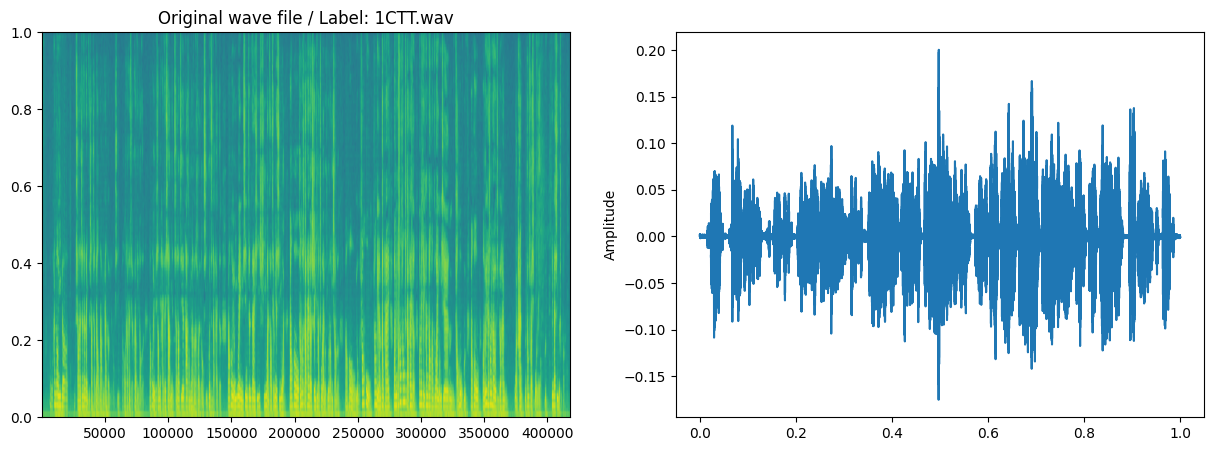

In [4]:
plot_spec(wav,sr,'Original wave file',file_path)
ipd.Audio(data=wav,rate=sr)

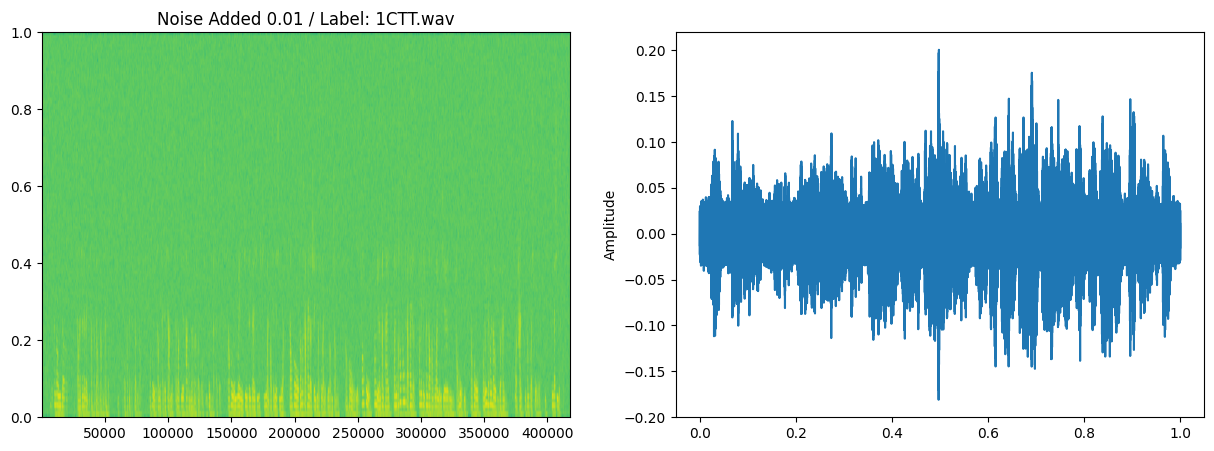

In [5]:
'''
Noise addition using normal distribution with mean = 0 and std =1

Permissible noise factor value = x > 0.004
'''
wav_n = wav + 0.01*np.random.normal(0,1,len(wav))
plot_spec(wav_n,sr,'Noise Added 0.01',file_path)
ipd.Audio(data=wav_n,rate=sr)
# librosa.output.write_wav('./noise_add.wav',wav_n,sr)
# sf.write('data_process/CTT5-1-17/64_1CTT.wav', wav_n, sr)
# sf.write('temp.wav', wav_n, sr)

sf.write('data_augmentation/1CTT_n.wav', wav_n, sr)

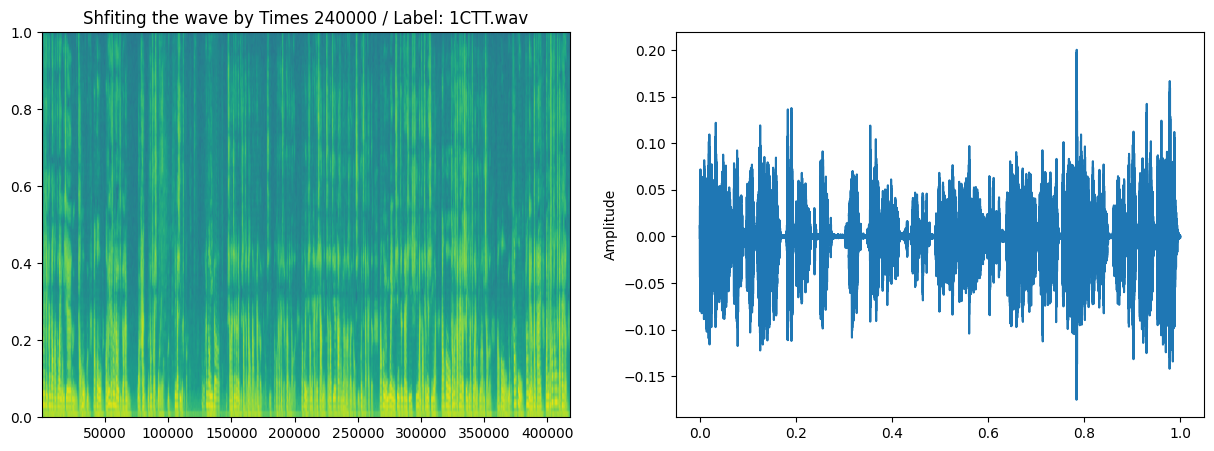

In [6]:
#Shifting the sound wave
'''
Permissible factor values = sr/10
'''

wav_roll = np.roll(wav,int(sr*15))
plot_spec(data=wav_roll,sr=sr,title=f'Shfiting the wave by Times {sr*15}',fpath=file_path)
ipd.Audio(wav_roll,rate=sr)
# librosa.output.write_wav('./roll.wav',wav_roll,sr)
# sf.write('data_process/CTT5-2-17/64_2CTT.wav', wav_roll, sr)

sf.write('data_augmentation/1CTT_r.wav', wav_roll, sr)

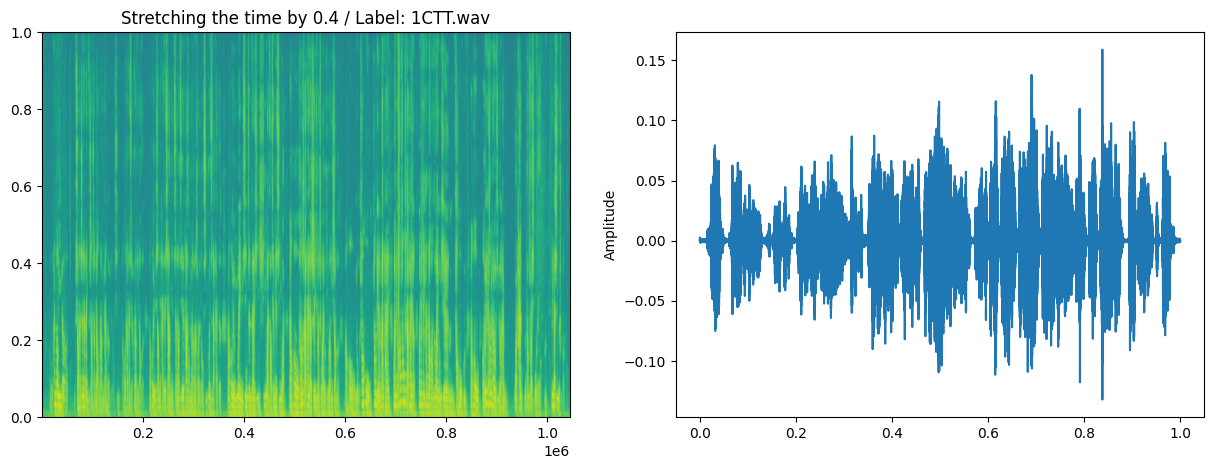

In [7]:
#Time-stretching the wave
'''
Permissible factor values = 0 < x < 1.0
'''

factor = 0.4
wav_time_stch = librosa.effects.time_stretch(wav, rate=factor)
plot_spec(data=wav_time_stch,sr=sr,title=f'Stretching the time by {factor}',fpath=file_path)
ipd.Audio(wav_time_stch,rate=sr)
# librosa.output.write_wav('./time_stech.wav',wav_time_stch,sr)
# sf.write('data_process/CTT5-3-17/64_3CTT.wav', wav_time_stch, sr)

sf.write('data_augmentation/1CTT_s.wav', wav_time_stch, sr)

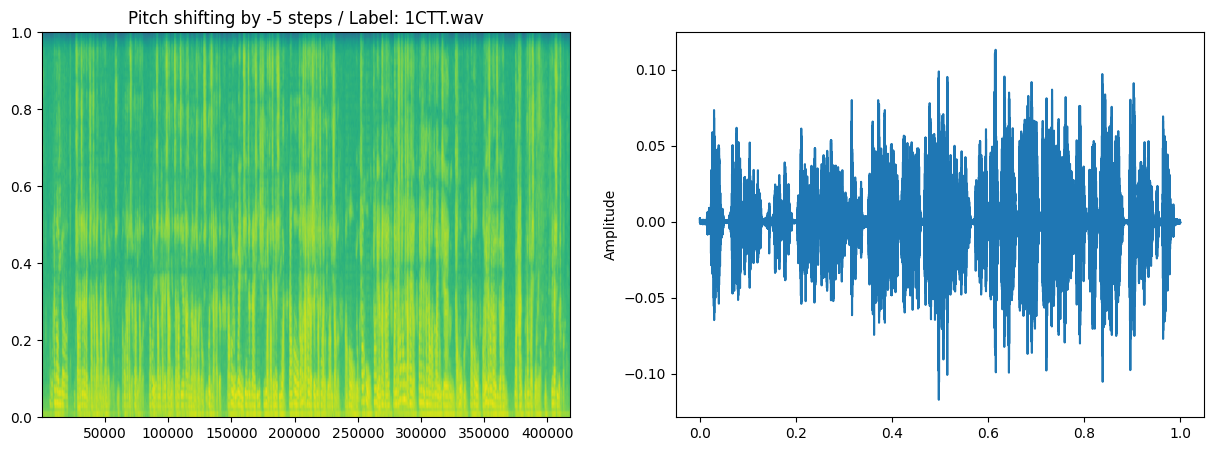

In [8]:
#pitch shifting of wav
'''
Permissible factor values = -5 <= x <= 5
'''
wav_pitch_sf = librosa.effects.pitch_shift(wav, sr=sr, n_steps=3)
plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting by {-5} steps',fpath=file_path)
ipd.Audio(wav_pitch_sf,rate=sr)
# librosa.output.write_wav('./pitch_shift.wav',wav_pitch_sf,sr)
# sf.write('data_process/CTT5-4-17/64_4CTT.wav', wav_pitch_sf, sr)

sf.write('data_augmentation/1CTT_p.wav', wav_pitch_sf, sr)